# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
# Load packages

library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Read in dataset

fw = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-08-09/wheels.csv',
                       show_col_types = FALSE)

# This data is from the TidyTuesday Project. It comes from the ferriswheels package by Emil Hvitfeldt.

fw |> head()

New names:
• `` -> `...1`


...1,name,height,diameter,opened,closed,country,location,number_of_cabins,passengers_per_cabin,⋯,ride_duration_minutes,climate_controlled,construction_cost,status,design_manufacturer,type,vip_area,ticket_cost_to_ride,official_website,turns
<dbl>,<chr>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,360 Pensacola Beach,200.00,NA,2012-07-03,2013-01-01,USA,Pensacola Beach; Florida,42,6,⋯,12.0,Yes,Unknown,Moved,Realty Masters of FL,Transportable,Yes,NA,NA,4
2,Amuran,303.00,199.8,2004-01-01,NA,Japan,Kagoshima; Kyushu,36,NA,⋯,14.5,Yes,Unknown,Operating,NA,NA,NA,NA,NA,1
3,Asiatique Sky,200.00,200.0,2012-12-15,NA,Tailand,Asiatique the Riverfront,42,NA,⋯,NA,Yes,Unknown,Operating,Dutch Wheels (Vekoma),NA,NA,NA,http://www.asiatiquesky.com/,NA
4,Aurora Wheel,295.00,272.0,NA,NA,Japan,Nagashima Spa Land; Mie; Honshu,NA,NA,⋯,NA,NA,Unknown,Operating,NA,Fixed,NA,NA,http://www.nagashima-onsen.co.jp/,NA
5,Baghdad Eye,180.00,NA,2011-01-01,NA,Iraq,Al-Zawraa Park; Baghdad,40,6,⋯,15.0,NA,$6 million USD,Operating,NA,NA,NA,3.5,NA,NA
6,Beijing Great Wheel,692.64,642.7,NA,NA,China,Chaoyang Park; Beijing,48,40,⋯,20.0,yes,$290 million USD,Delayed,The Great Wheel Corporation,Fixed,NA,NA,NA,1


In [3]:
# Sorting so only the 8 countries with the most ferris wheels are named explicitly

fw_sorted = fw |>
    mutate(country = fct_infreq(country)) |>
    mutate(country = fct_lump(country, n = 8)) |>
    mutate(country = fct_relevel(country, 'Other', after = Inf)) |>
    mutate(country = fct_rev(country))

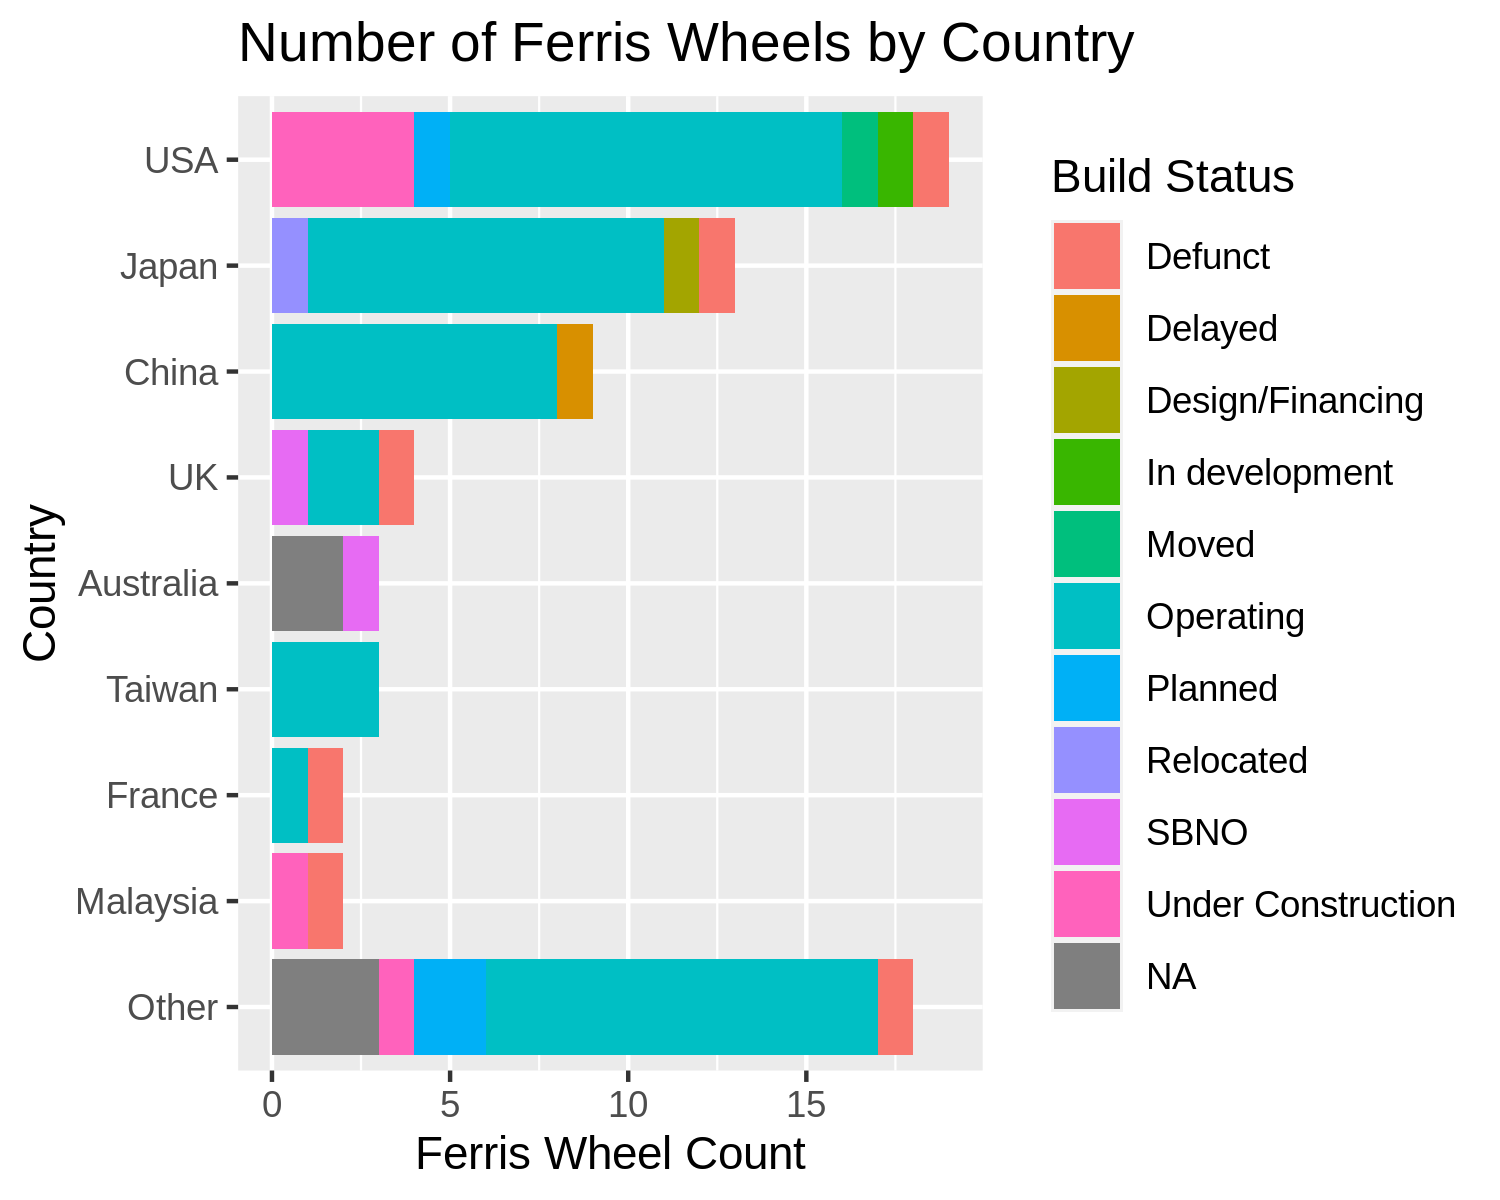

In [9]:
# Visualization 1: ferris wheel count by country

p = ggplot(fw_sorted, aes(y = country))

p = p + geom_bar(aes(fill = status))

p = p + labs(x = 'Ferris Wheel Count', y = 'Country',
            title = 'Number of Ferris Wheels by Country',
            fill = 'Build Status') 
        
p

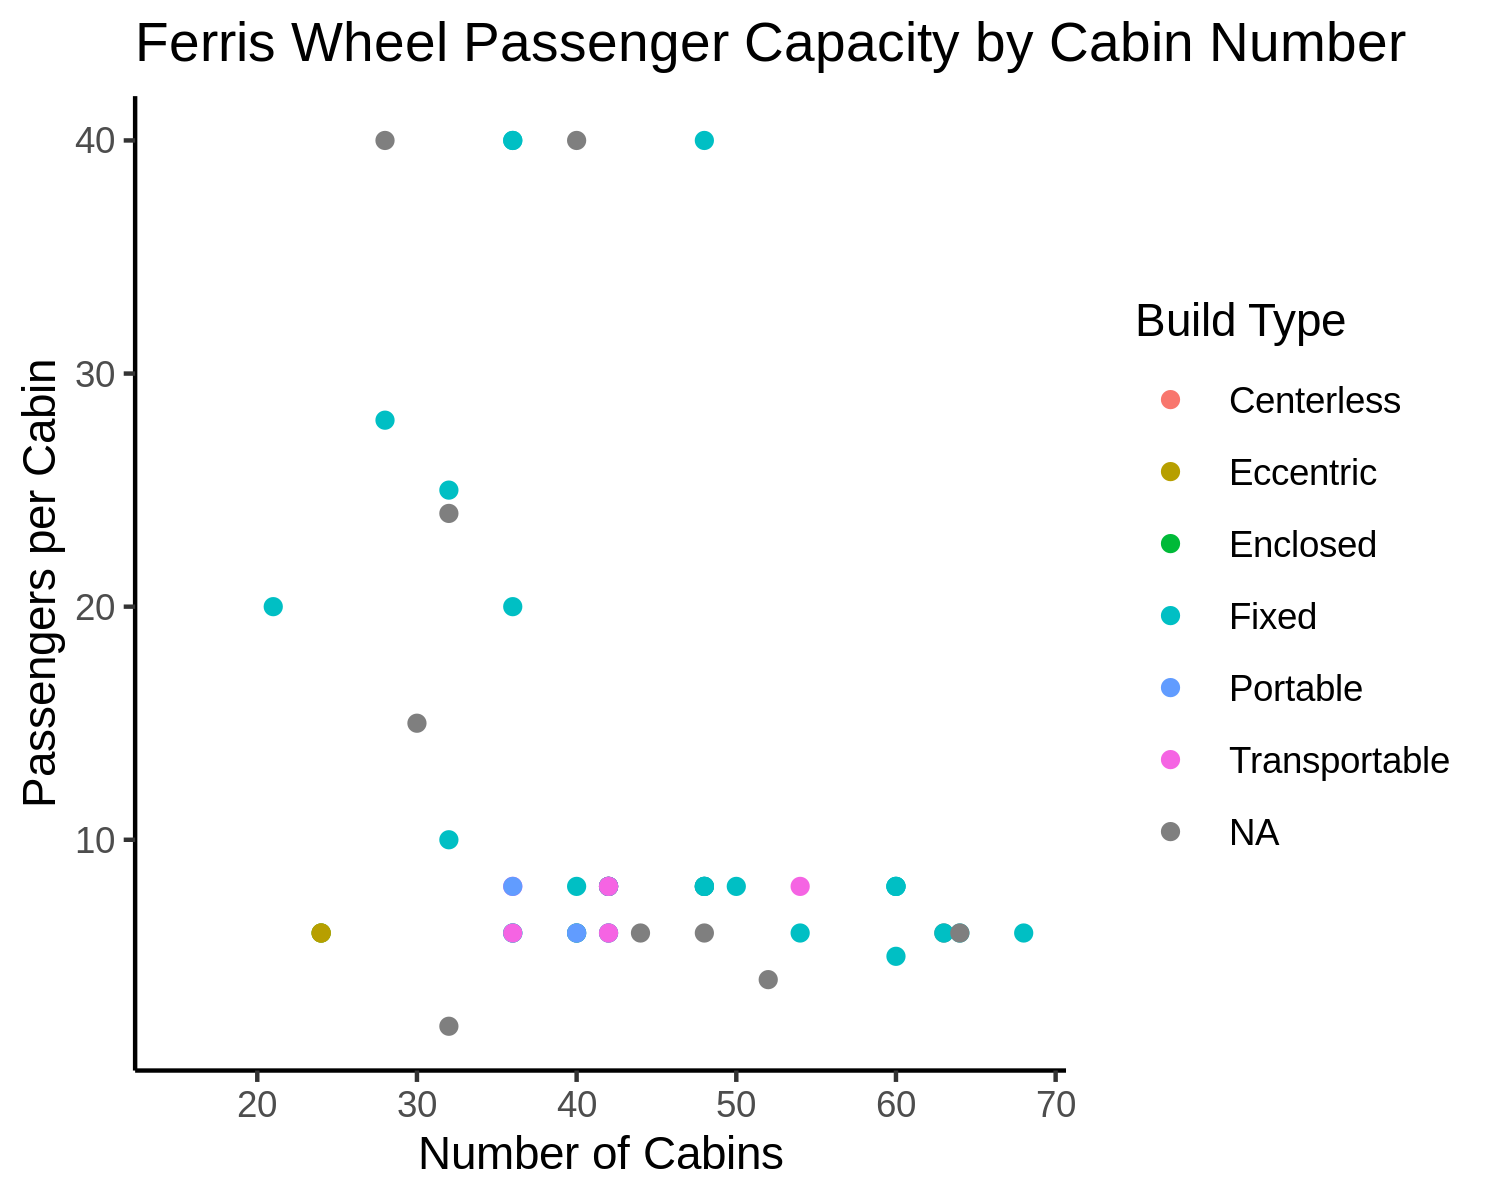

In [7]:
#Visualization 2: number of cabins vs passengers per cabin

p = ggplot(fw_sorted, aes(x = number_of_cabins, y = passengers_per_cabin))

p = p + geom_point(na.rm = TRUE, aes(color = type))

p = p + labs(x = 'Number of Cabins', y = 'Passengers per Cabin',
            title = 'Ferris Wheel Passenger Capacity by Cabin Number',
            color = 'Build Type') 

p = p + theme_classic()

p

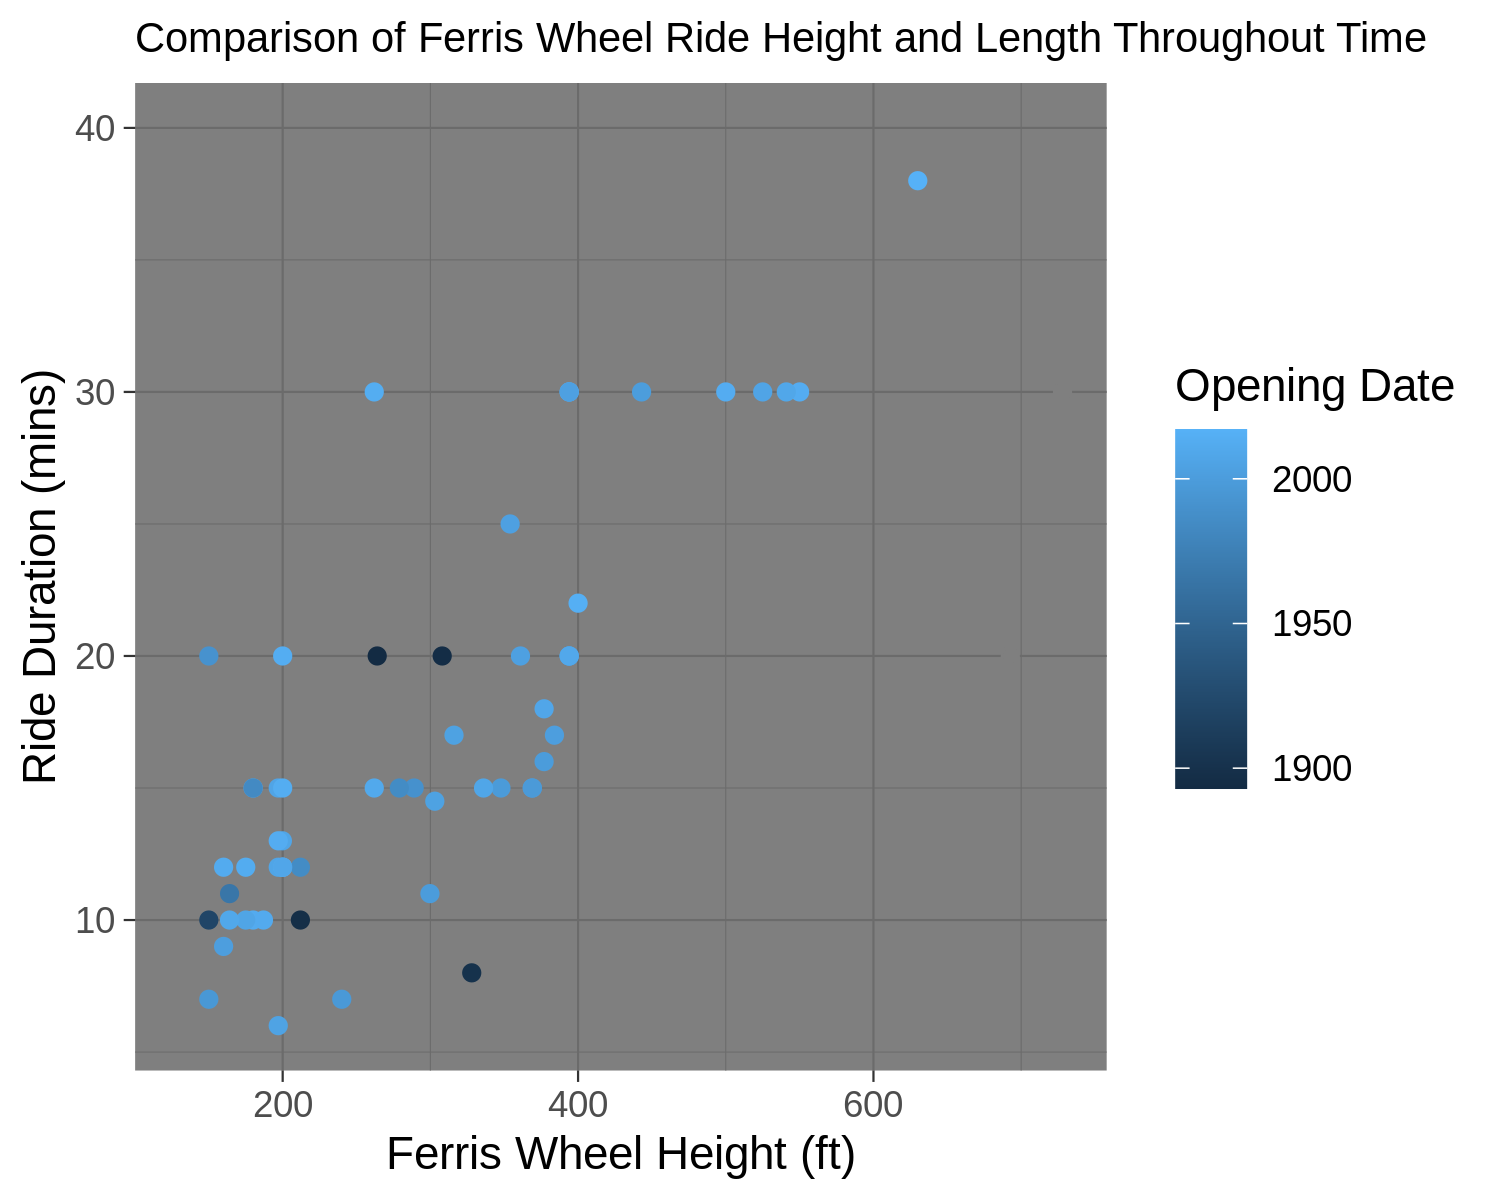

In [6]:
# Visualization 3: duration of ride in minutes vs height of ferris wheel in feet

p = ggplot(fw_sorted, aes(x = height, y = ride_duration_minutes, color = opened))

p = p + geom_point(na.rm = TRUE) 

p = p + labs(x = 'Ferris Wheel Height (ft)', y = 'Ride Duration (mins)',
            title = 'Comparison of Ferris Wheel Ride Height and Length Throughout Time',
            color = 'Opening Date') 

p = p + theme_dark()

p = p + theme(plot.title = element_text(size = 10))

p

    For this project, I used the ferriswheels dataset from the TidyTuesday project on GitHub. My first visualization is a frequency count of the number of ferris wheels per country in the dataset, and is categorized by their build status. This figure was meant to just give a general sense of the data.
    
    My other visualizations compare different aspects of these ferris wheels. The second visualization shows the number of cabins of the ferris wheels and how many passengers they can hold. I sorted this by the build type, as I thought that might affect the capacity of the ferris wheel. I noticed that both the number of cabins and the number of passengers per cabin are much higher than I anticipated. Though most of the rides have less than ten passengers per cabin. Those that do house more generally have a lesser number of cabins, and are fixed.
    
    The third visualization show the height of the ferris wheels and how long their rides are. I colored them to show their opening dates, as I thought that there might be a progression of taller, longer rides over time. There seems to be a clear association between ferris wheel height and ride length, which makes sense, but it is somewhat difficult to assess the correlation with when the rides were built, as the opening dates in the data set are skewed heavily, with most around or after the year 2000.